In [1]:
# Necessary imports 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
# helper function for printing unique values in columns 
def print_unique(df, col):
    print(f"The {col} column contains:")
    u_vals = df[col].unique()
    for i, val in enumerate(u_vals):
        print(f"{i+1}. {val}")

## About the Dataset
I found this dataset [here](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) on Kaggle.

Campus Recruitment is an obstacle that almost all Engineering students face at some point in their lives. (Except of course for those special snowflakes that decide to pursue higher studies instead). As a final year Computer Science Student, I was instantly drawn to this dataset in hopes of not only understanding the general trend in the industry but also of reassuring myself that I was not a lost cause. Although this dataset is from an MBA college, I think it can still be used to extract valuable information about how one's academic choices can impact their placements.

A quick glance at the dataset description on Kaggle tells us that it has the following columns:
1. `sl_no` : Serial Number
2. `gender` : Gender- Male='M',Female='F'
3. `ssc_p` : Secondary Education percentage- 10th Grade
4. `ssc_b` : Board of Education- Central/ Others
5. `hsc_p` : Higher Secondary Education percentage- 12th Grade
6. `hsc_b` : Board of Education- Central/ Others
7. `hsc_s` : Specialization in Higher Secondary Education
8. `degree_p` : Degree Percentage
9. `degree_t` : Under Graduation(Degree type)- Field of degree education
10. `workex` : Work Experience
11. `etest_p` : Employability test percentage ( conducted by college)
12. `specialisation` : Post Graduation(MBA)- Specialization
13. `mba_p` : MBA percentage
14. `status` : Status of placement- Placed/Not placed
15. `salary` : Salary offered by corporate to candidates

Let us quickly view the first few rows and extract some prelimindary information about the dataset.

In [3]:
# Loading in the dataset and viewing first few rows 
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


here

In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Observations: 
It seems that we have some big outliers in the salary. The mean is about 2.9 lakhs with a standard deviation of about 90,000 but we have some salary that is over 9 Lakhs, which is more than 6 standard deviations away from the mean!

Looks like we have some missing values in the "salary column". This is probably for the students who were not placed but let us just check to make sure that the students who are placed all have their salary listed. 

In [5]:
# Check for missing salaries
df.query("status == 'placed'")["salary"].isnull().any()

False

Looks like all the placed students all have their salaries listed so we could try and predict that down the line. However, we will only have 148 samples to work with in that case. Let's go ahead with some analysis for now and we'll cross that bridge when we get to it.

# Business Understanding
The first step of the CRISP-DM process is to develop a **Business Understanding**. This means asking relevant questions that we want the data to answer. After examining the data, I am particularly interested in the `Status` (whether or not the student was placed) and `Salary` (How much the student is paid by the corporate). The data available on hand makes it possible to ask questions such as:  

* Does the board of education influence placements? 

* Is there a gender bias when it comes to salaries offered to new recruits? 

* Do companies prefer candidates with prior work experience? 

* Which combination of degree/specialization has the highest salary?


# Data Understanding 

Let us  break down these questions and others and try to answer them by analysing and visualizing our data. 

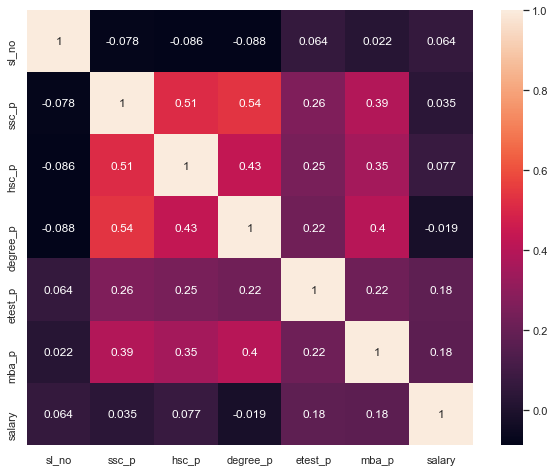

In [6]:
# Checking for correlations among columns
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

From the above heatmap, there doesnt seem to be any significant correlations present in the data.

We do however, see some weak correlation between the `hsc_p`, `ssc_p` and `degree_p` columns. But this is to be expected as a student who performed well in their 10th is likely to continue to work hard and perform well in their subsequent academic endeavours. The inverse may also be true.

We do see some slight correlation between salary and `mba_p` and `etest_p`. While it makes intuitive sense to me that since the recruitment is for MBA graduates, their MBA scores and E-Test scores (Employability test) might have a correlation with their chances of getting placed or salary, the data on hand does not provide us with strong enough evidence to confirm or deny the same.  

## Question 1 
### Does the board of education affect placements? 
Reasoning: I find this question particularly interesting because the general trend that I have observed in new parents these days is their increasing preference to enrol their kids into the central board than state. This dataset allows us to investigate the following two questions: 

a. Are kids from CBSE or higher more likely to get placed than those that are not?  
b. Are these kids more likely to get a higher salary? 

In [7]:
# Check the number of unique values 
print_unique(df, "ssc_b")
print_unique(df, "hsc_b")

The ssc_b column contains:
1. Others
2. Central
The hsc_b column contains:
1. Others
2. Central


In [8]:
# Create filter for SSC Central board 
ssc_central = df.ssc_b == "Central"

# Create filter for HSC Central board 
hsc_central = df.hsc_b == "Central"

both = ssc_central & hsc_central
neither = ~ssc_central & ~hsc_central

df.groupby(["ssc_b", "hsc_b"]).status.value_counts().reset_index(name="count")  

,ssc_b,hsc_b,status,count
0,Central,Central,Placed,53
1,Central,Central,Not Placed,24
2,Central,Others,Placed,25
3,Central,Others,Not Placed,14
4,Others,Central,Placed,4
5,Others,Central,Not Placed,3
6,Others,Others,Placed,66
7,Others,Others,Not Placed,26


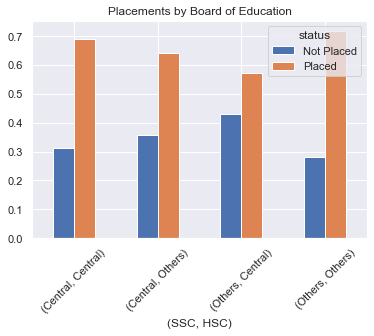

In [9]:
# Vizualization of board vs placement rate 
grouped_data = df.groupby(["ssc_b", "hsc_b"]).status.value_counts(normalize=True).unstack(2)
grouped_data.plot.bar(title = "Placements by Board of Education", rot = 45).set_xlabel("(SSC, HSC)");

From the above plots, it might seem that those who took a combination of Central and Others between their 10th and 12th grades were less likely to get placed than those that took Central or Others consistently. However, looking at the number of samples in each of these groupings, we see that (Others, Central) and (Central, Others) have significantly fewer samples than the other two. For our analysis, we will focus on (Central, Central) and (Others, Others) and see if one has any noticeable advantages over the other.

### Exploring Board vs Salary 

From the above graph, it seems that the choice of board doesnt seem to particularly increase one's chances of getting placed but maybe it has a role to play in determining ones salary? Let's check!

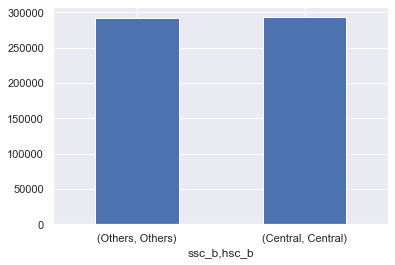

In [10]:
# Plotting Board vs Salary
salary_by_board = df[both | neither].groupby(["ssc_b", "hsc_b"]).salary.mean().sort_values()
salary_by_board.plot.bar(rot=0);

These two groups seem to have about the same average salary. If the board did indeed matter, we would expect one group to have significantly higher salary than the other. In case of the number of placed themselves, the (others, others) group does seem to have slightly higher chances of placements but this could be attributed to the difference in sample counts. 

Now that we have checked potential reasons for parents to choose Central over others, let us now analyse from a student's perspective. The general opinion is that Central board can be much harder than others (i.e state board). Does this mean that students have to work harder to get placed in one group than the other? Let us check.

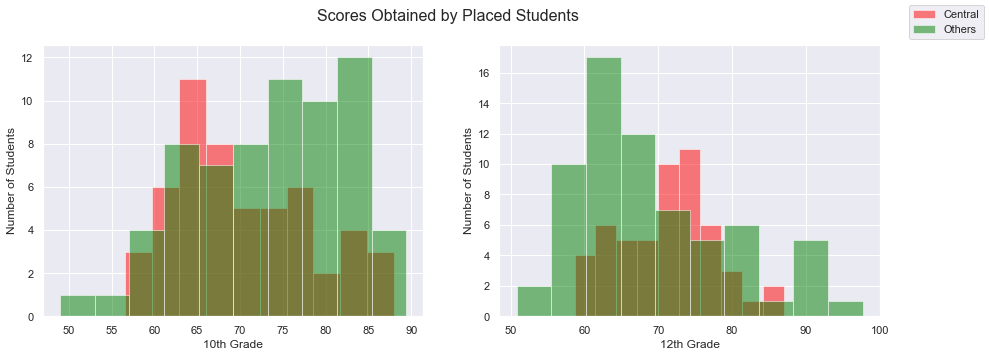

In [11]:
# Create a filter for placed students 
placed = df["status"] == "Placed"

# Plotting distribution of scores for placed students in Central and Others
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))

axes[0].hist(df[both & placed].ssc_p, alpha = 0.5, label = "Central", color = "red");
axes[0].hist(df[neither & placed].ssc_p, alpha = 0.5, label = "Others", color = "green");
axes[0].set_xlabel("10th Grade")
axes[0].set_ylabel("Number of Students")

axes[1].hist(df[both & placed].hsc_p, alpha = 0.5, label = "Central", color="red");
axes[1].hist(df[neither & placed].hsc_p, alpha = 0.5, label = "Others", color="green");
axes[1].set_xlabel("12th Grade")
axes[1].set_ylabel("Number of Students")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Scores Obtained by Placed Students", fontsize=16)
plt.show()

It seems that among the placed students, those from Central Board scored less in the 10th grade than their `Others` counterparts. This could be an indication of how the examinations in the central board tend to be more difficult resulting in a lower average score. However, the opposite seems to be true in the case of the 12th grade. Maybe the more rigorous process the students faced in their secondary schooling better prepared them for their 12th? 

You know what they say : "*Some questions are better left ~~unanswered~~ for a different dataset.*"

## Question 2
### Does it really matter how much you score in your school days? 

Growing up with Indian parents, I was always told throughout my school days that I should work hard and do well in my exams so that one day I would be able to *reap its benefits*. This led me to always trying to score as highly as I could on my examinations. This dataset makes me want to ask "Does it really matter how much you score?" or to ask a more appropiate question : "Is there evidence to prove that scoring higher in your school days helps you get placed?" 

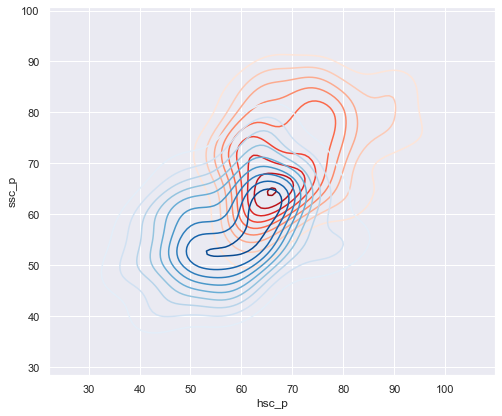

In [12]:
# Plots to see 
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
sns.kdeplot(df[placed].hsc_p, df[placed].ssc_p, cmap="Reds",shade_lowest=False)
sns.kdeplot(df[~placed].hsc_p, df[~placed].ssc_p,  cmap ="Blues", shade_lowest=False)
plt.show();

Interesting! There does seem to be a visible trend here. Students who got Placed (orange) seem to have on an average, scored better in both their 10th and 12th than their Non Placed counterparts (blue). It could be the case that the scores were indeed helpful in impressing potential emloyers but on the other hand it is also possible that those students that worked hard in their school days developed the right mindset to keep working and built other skills that increased their employability. 

## Question 3

### Is one stream inherently better than the other? 

When we complete our 10th grade education, we are met with arguably the most important crossroads our our lives. What next : Science, Commerce or Arts? 
Unfortunately during my 10th grade, I was faced with a number of health issues and I had to rely on my parents and relatives to choose my path for me and they insisted that I take up science, citing reasons such as "there's a lot of scope for science" and "you'll get job easily". 

Looking back on my journey so far, I do not regret having taken up Science because eventually Computer Science is where I found my calling. But I'm curious to see if students in one stream are more likely to get a job than some other. Is my relatives' line of reasoning correct?

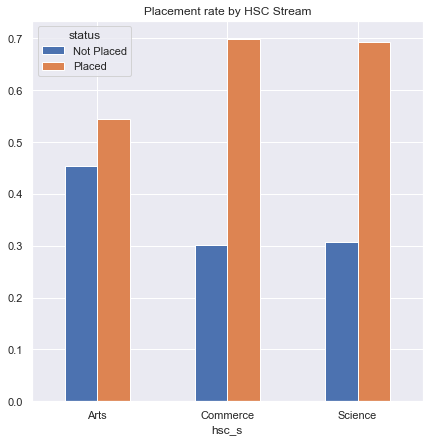

In [13]:
# Plotting placement rate by Stream
df.groupby("hsc_s").status.value_counts(normalize=True).unstack(1).plot.bar(figsize=(7,7), title = "Placement rate by HSC Stream", rot=0);

Arts does seem to be lagging behind in placements but then again it has significantly fewer samples than commerce and science. For our anaylsis, we will focus on only Science and Commerce, which from the looks of it, have near-identical placment rates. 

Maybe one stream is more likely to be offered a higher salary?

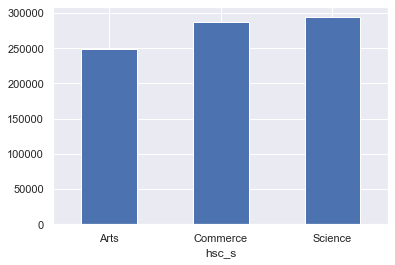

In [14]:
df.groupby("hsc_s").salary.mean().plot.bar(rot=0);

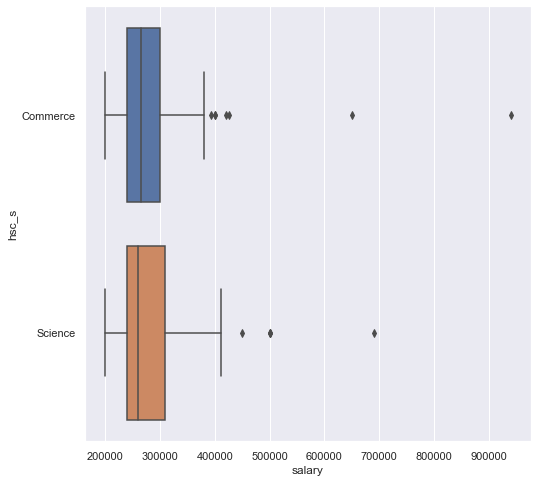

In [15]:
# Create filter for science
science = df["hsc_s"] == "Science"

# Create a filter for commerce
commerce = df["hsc_s"] == "Commerce"

# Plot Salary distribution by Stream
plt.subplots(figsize=(8,8))
sns.boxplot(x="salary", y="hsc_s", data =df[science | commerce]);

Looks like both streams have about the same spread of salaries. There are some outliers in both cases and Science does seem to have an ever-so-slightly higher third quartile value. But not enough to make it significant. 

***Conclusion*** : *My relatives are lunatics.*

## Question 4 
### Which degree and MBA specialization has the highest Salary?

We finally come to what I think might be the most relevant information to an employer. A student's MBA specialization is closely tied to the kind of skills that a company would be looking for and consequently, the salary being offered. The next closest qualification of importance would be the student's undergraduate degree. Let us look at how these two features affect the salaries being offered. 

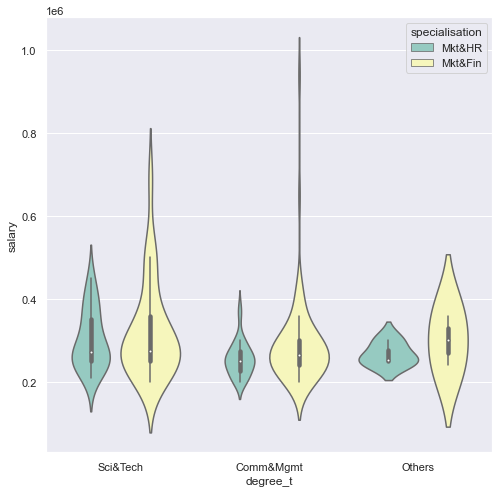

In [16]:
# Plotting Salary vs specialization and degree
plt.subplots(figsize=(8,8))
sns.violinplot(x="degree_t", y="salary", hue="specialisation", data=df, scale="count", palette="Set3");

It seems as though the highest salaries that were offered were to students who pursued the Marketing & Finance specialisation after obtaining a UG degree in Commerce and Management. However, these are clearly major outliers. It seems than in general, Students with a Science and Technology UG degree pursuring Mkt&Fin specialization were more likely to get higher paying jobs.

## Question 5
### Does gender bias exist in campus recruitment? 

The last question that I would like to answer is an important one. Do companies seem to discrimate between men and women when it comes to placements and salaries? 

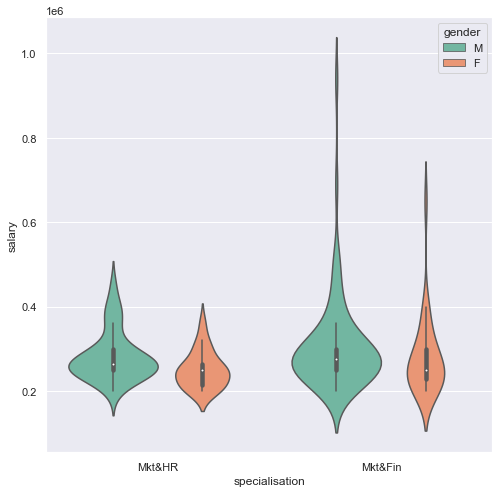

In [17]:
# Plotting salaries vs gender by specialization
plt.subplots(figsize=(8,8))
sns.violinplot(y = "salary", x="specialisation", hue = "gender", palette="Set2", data=df, scale="count");

There does seem to be a general trend that men in this dataset ghave been paid higher than women. But we can also see that the dataset contains fewer samples of females than it does of males. Regardless, I think this is slightly concerning and that the dataset creator might want to take this up with his college!

# Data Preparation 

This dataset has very few samples and even fewer if we eliminate the ones without a specified salary. So instead of predicting salary I would like to predict whether a student would be placed or not. I start by creating a feature matrix `X` containing all the features from the dataset except for `Salary` and `Status`. I also drop the serial number as it could potentially lead to overfitting and adds no useful information to the dataset. 

Then I proceeded to One-hot encode for the categorical variables and dropped the original ones. Since most of the categorical columns contained only 2 or 3 unique values, the final dataset was not bloated too much and had 14 columns for the model to work with. 

However, when I tried to train the model, I ran into an error that prevented the Linear SVM from converging. [This](https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati) post on stackoverflow explained that one way to solve it was to make use of a Standard Scaler to normalize the data in order to speed up convergence and doing so hepled me correctly fit the model.

In [18]:
from sklearn.preprocessing import StandardScaler

# Data Preparation
X = df.drop(["salary", "status", "sl_no"], axis = 1)
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols
y = df["status"]

In [19]:
# Checking the final dataset
X.head(5)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0.739434,1.082459,0.800763,0.950082,-0.856663,-0.23221,1.626059,-0.724446,1.123903
1,1.113369,1.103448,1.513267,1.087157,0.687620,0.739434,-0.923823,0.800763,-1.052541,1.167321,-0.23221,1.626059,1.380364,-0.889757
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0.739434,-0.923823,-1.248809,-1.052541,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0.739434,-0.923823,-1.248809,-1.052541,1.167321,-0.23221,1.626059,-0.724446,1.123903
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0.739434,-0.923823,-1.248809,0.950082,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757


# Modelling & Evaluation
Based on the cheat sheet provided [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). I will try to use Linear SVC. 

Since the number of samples in the dataset is pretty small, using a traditional train-test split means we would be losing out on data, which is already a precious commodity. We would not be able to trust the final score as much, since we would be introducing some bias towards the training set. 

I decided to make use of KFold cross validation so that the final score would be a better representation of real-world performance. 

In [20]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

scores = []
kfold = KFold(n_splits=5, random_state = 42, shuffle=True)
for train_index, test_index in kfold.split(X):
    model = LinearSVC()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train);
    scores.append(model.score(X_test, y_test))
    
print(f"CV score is: {sum(scores)/len(scores)}")

CV score is: 0.8651162790697674


Not bad! We were able to achieve a cross-validation score of 0.865 

Considering that we only had about 200 samples to work with, this score seems pretty decent.This means that although we only had such a small dataset to work with, the Linear SVM model was able to find some patterns within in and is able to predict whether a student will be placed or not, based on the data provided!

# Conclusion

## Quick Recap
In this notebook, we explored dataset containing campus recruitment data for students from an MBA college. Though our analysis, we found that:
1. The board of school education doesnt matter when it comes to placements or even salaries. 
2. Placed students seem to have performed better in their 10th and 12th exams than Non Placed Students 
3. Among the various specializations, students with a Sci&Tech UG degree and Mkt&Fin MBA specialization appear to have slightly higher salaries.
4. The salaries for female students seems to be generally slightly lower than men.

We then proceeded to fit a linear SVM to predict whether or not a student would be placed and  achieved reasonably good results, with a test accuracy of **86.5**% after some data preprocessing.

## What does this mean for you?  

We must first understand that the results and observations made in this notebook need to be taken with a grain of salt. After all, this dataset is not representative of the full spectrum of students that one comes across during a campus recruitment program. The dataset itself is quite limited in nature and as such, varies in the number of samples between different groups making it diffult to report with confidence the trends that we come across.

Instead, I urge you to simply follow your heart and make your own choices. Regardless of what a dataset might indicate as being the *best stream* or *best specialization*, ultimately, the *best job* is the one that makes you happy! 

Good luck!